In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as clr
import RELACS as rel
import os
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


0 0
-0.27313540238381995
done computing 9284
done plotting
0 1
-0.058937376636202854
done computing 9246
done plotting
0 2
0.06817150264157928
done computing 8751
done plotting
0 3
-0.8073549220576041
done computing 8612
done plotting
0 4
0.0929906738306925
done computing 8658
done plotting
0 5
1.8275556352415794
done computing 8889
done plotting
0 6
0.19086608709230782
done computing 9156
done plotting
1 0
0.3097584920568697
done computing 9344
done plotting
1 1
0.018738724719766786
done computing 9338
done plotting
1 2
0.13750352374993496
done computing 9203
done plotting
1 3
-0.5873702701224762
done computing 9194
done plotting
1 4
0.27635578433162783
done computing 9207
done plotting
1 5
1.9686020324279192
done computing 9257
done plotting
1 6
0.3644114262088758
done computing 9329
done plotting
2 0
-0.11547721741993605
done computing 160080
done plotting
2 1
-0.37851162325372967
done computing 164462
done plotting
2 2
-0.27753397552890874
done computing 141868
done plotting
2 3
-1

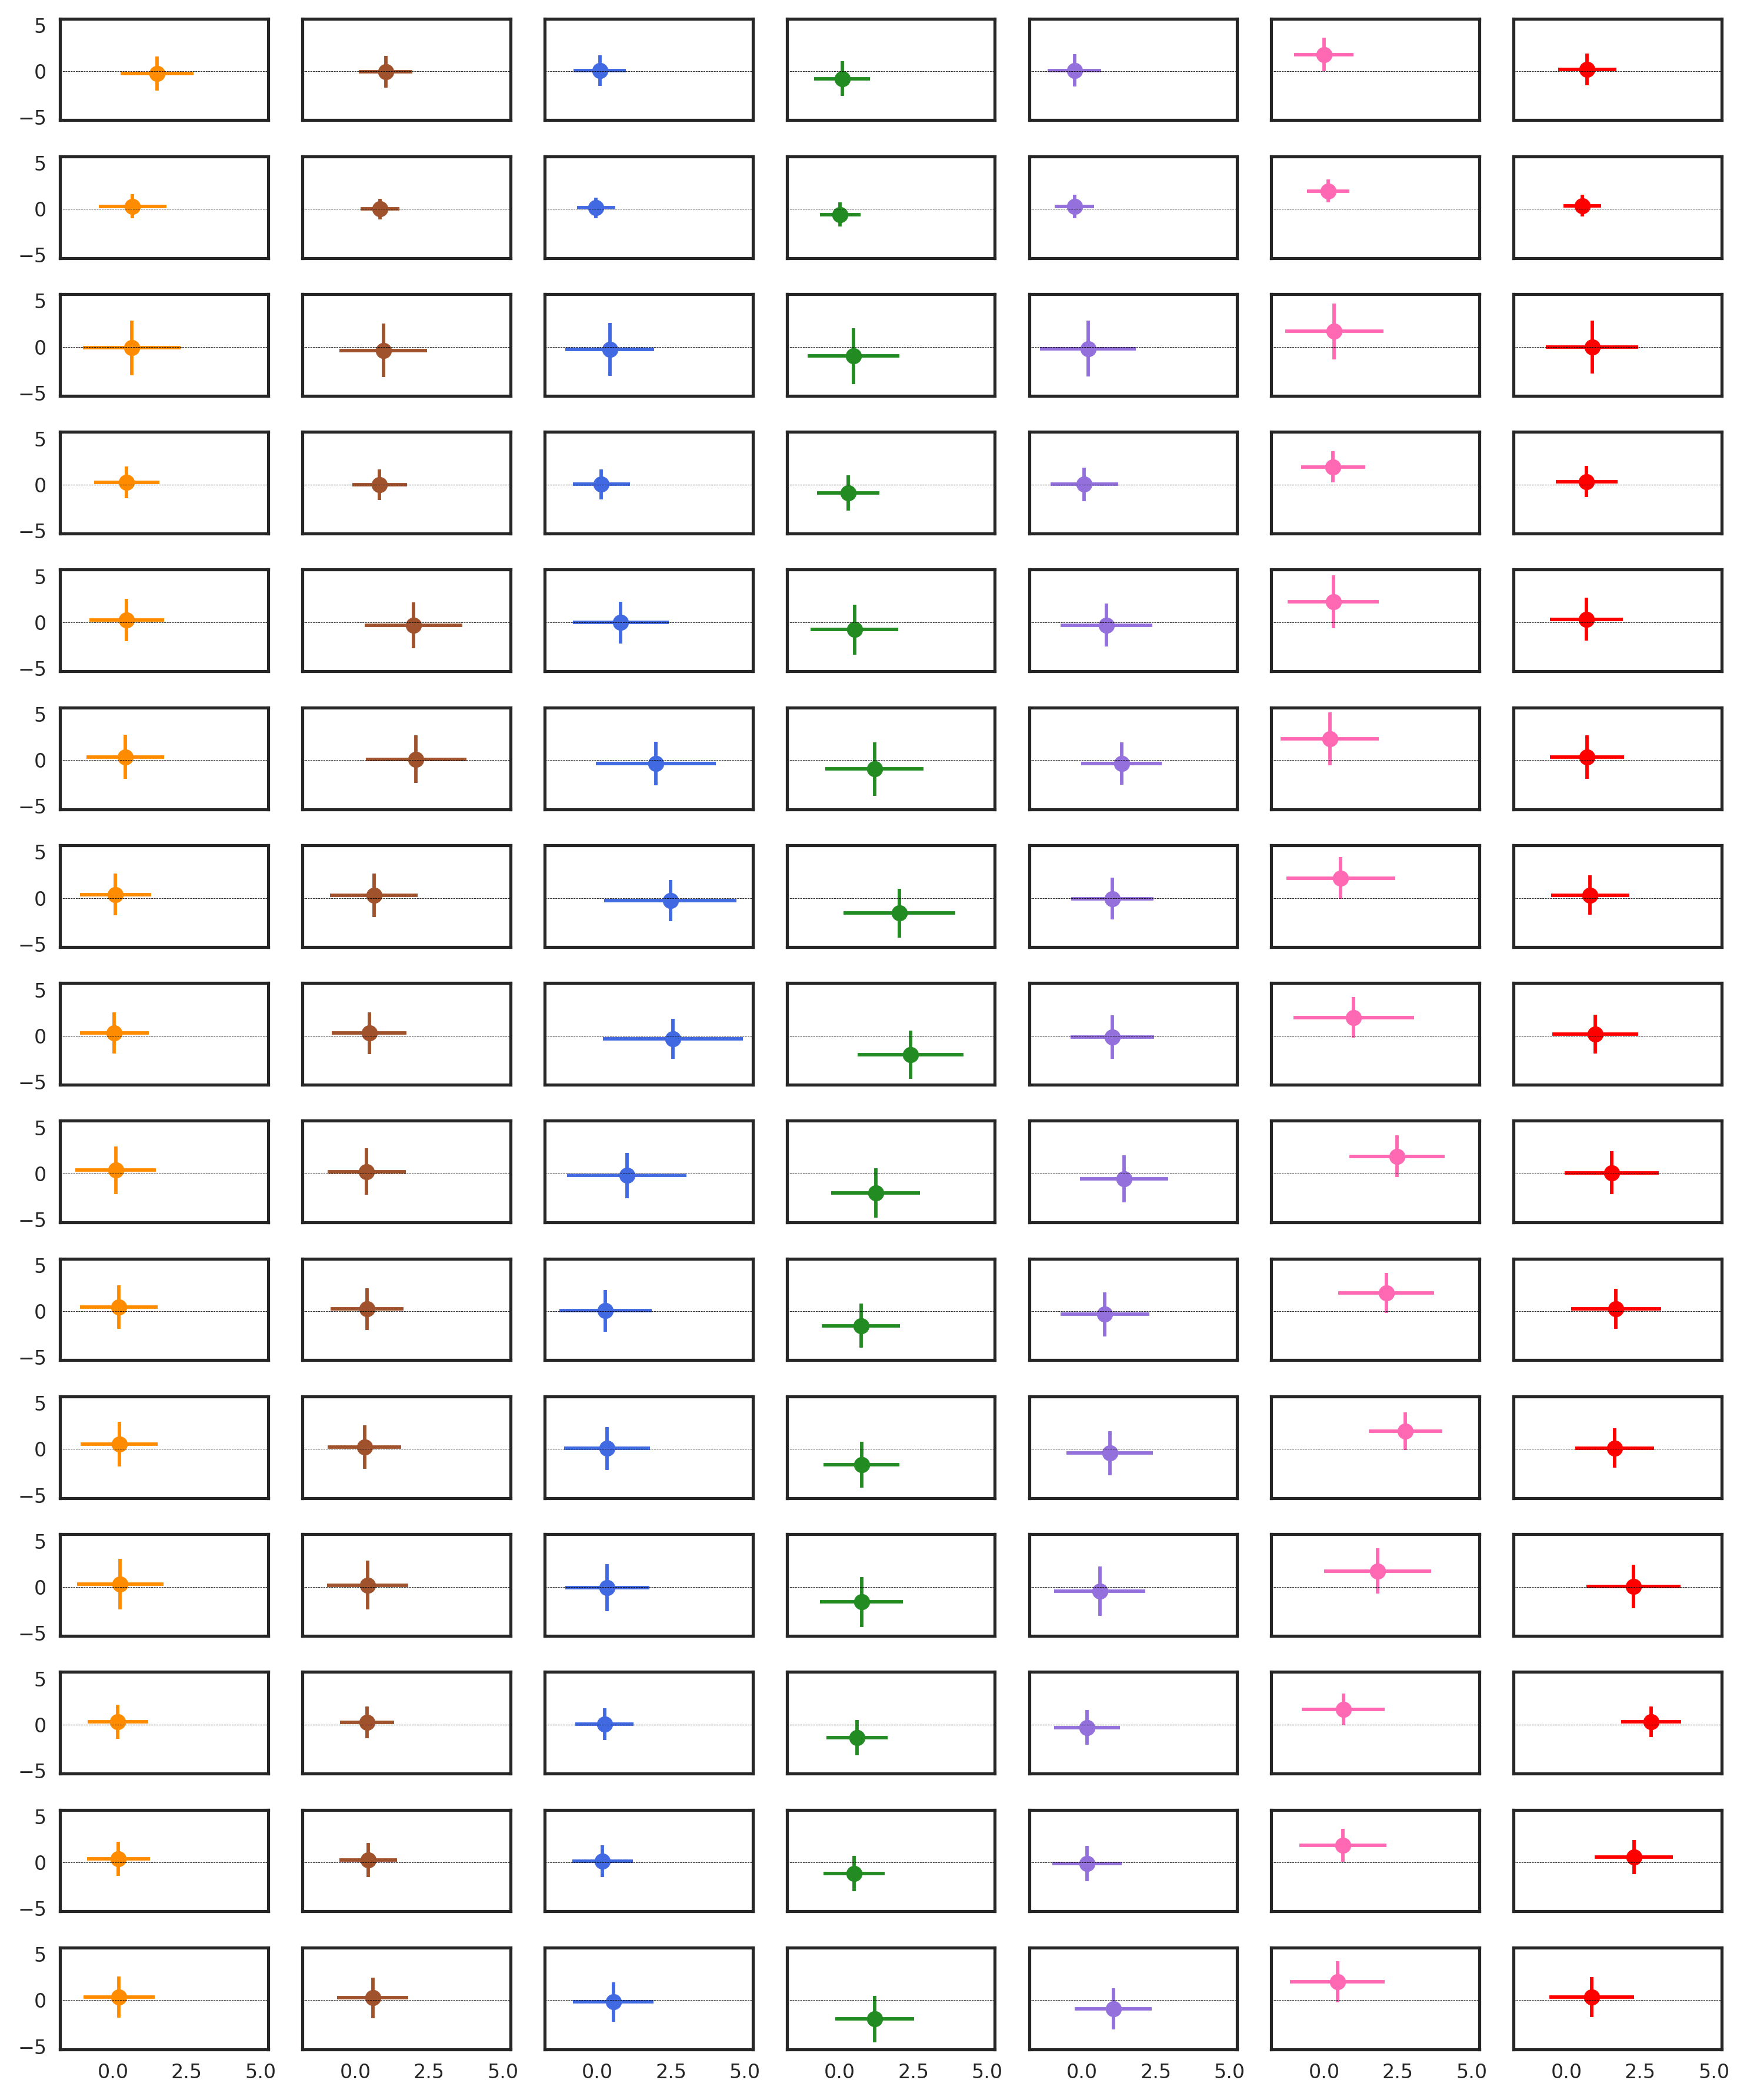

In [7]:
fig,ax = plt.subplots(15,7, dpi=300, figsize=(10,12), sharex=True, sharey=True)
states = ["E{}".format(i) for i in range(1,16)]

marks = ["H3K9me3","H3K27me3","H3K4me3","H3K27ac","H3K4me1","H3K79me2","H3K36me3"]


cols={"H3K4me3":'royalblue',
      "H3K4me1":'mediumpurple',
      "H3K27ac":'forestgreen',
      "H3K36me3":'r',
      "H3K27me3":'sienna',
      "H3K9me3":'darkorange',
      "H3K79me2":'hotpink',
      "Input":'k'}

for state_idx in range(len(states)):
    for mark_idx in range(len(marks)):
#         cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['white',cols[marks[mark_idx]]], N=256)
        print(state_idx,mark_idx)
        counts_ = pd.read_csv("/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/downstream_analysis/Global_Changes_on_chrom_states/counts/{}/{}_NPC48h_vs_mESC_E1.counts".format(states[state_idx],marks[mark_idx]), sep="\t")
        counts = rel.preprocess_deeptools(counts_, merge_rep=True, list_of_columns=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]])
        counts_norm = rel.Normalize_T(counts)
        axxx,lfc,cov = rel.MA_samp(counts_norm, ["'mESC_DMSO_rep1_{}_merged.filtered'+'mESC_DMSO_rep2_{}_merged.filtered'".format(marks[mark_idx],marks[mark_idx]), "'iNPC_DMSO_rep1_{}_merged.filtered'+'iNPC_DMSO_rep2_{}_merged.filtered'".format(marks[mark_idx],marks[mark_idx])])
        print("done computing", len(lfc))
        xxx = np.median(cov)
        yyy = np.median(lfc)
        x_std = 2 * np.std(cov)
        y_std = 2 * np.std(lfc)
        ax[state_idx][mark_idx].axhline(0, linewidth=0.2, linestyle="--", color='k')
        ax[state_idx][mark_idx].scatter(xxx, yyy, color = cols[marks[mark_idx]], s=40)
        ax[state_idx][mark_idx].errorbar(xxx, yyy, yerr=y_std, xerr=x_std, ecolor=cols[marks[mark_idx]], capthick=0)
#         sns.kdeplot(lfc,cov, cmap=cmap, shade=True,shade_lowest=False, alpha=0.8, ax = ax[state_idx][mark_idx])
        print("done plotting")




        #rel.MA_samp(counts_norm, ["'mESC_DMSO_rep1_{}_merged.filtered'+'mESC_DMSO_rep2_{}_merged.filtered'".format(marks[mark_idx],marks[mark_idx]), "'iNPC_DMSO_rep1_{}_merged.filtered'+'iNPC_DMSO_rep2_{}_merged.filtered'".format(marks[mark_idx],marks[mark_idx])], ax=ax[state_idx][mark_idx])

plt.tight_layout()        
plt.savefig("../FIGURES/AllStates_mESC_AllMarks_density.png")